In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df2=pd.read_csv("/content/LED.csv")

In [ ]:
df2.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,c###bd,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df2.duplicated().sum()

np.int64(6)

In [ ]:
df2.drop_duplicates(inplace=True)

In [ ]:
df2.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df2.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [ ]:
df2["Population"]=df2["Population"].fillna(df2["Population"].mean())

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df2[['GDP']] = imputer.fit_transform(df2[['GDP']])

In [ ]:
df2.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
colu=df2.select_dtypes(include="number").columns
for i in colu:
  if df2[i].isnull().sum() != 0:
    df2[i]=df2[i].fillna(df2[i].mean())

In [ ]:
df2.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
df2.shape


(2938, 22)

In [ ]:
file.isnull().sum()

NameError: name 'file' is not defined

#perform EDA

In [ ]:
df2.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.922493e+01,9.507640e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647964e+02,1.240803e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.094046e+01,2.258685e+01,1.00000,80.940461,8.700000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.832125e+01,1.992768e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [ ]:
df2.select_dtypes(include="object").describe().T

,count,unique,top,freq
Country,2938,195,Albania,16
Status,2938,2,Developing,2426


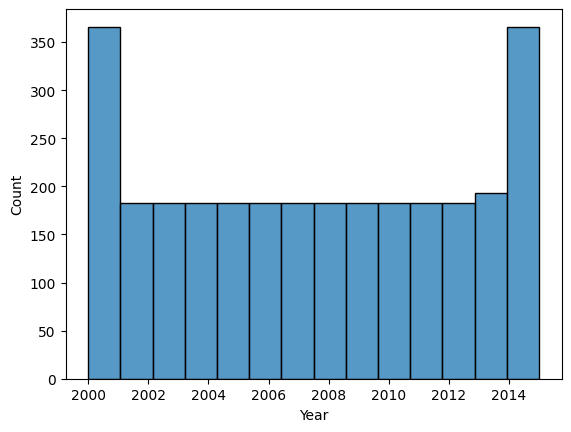

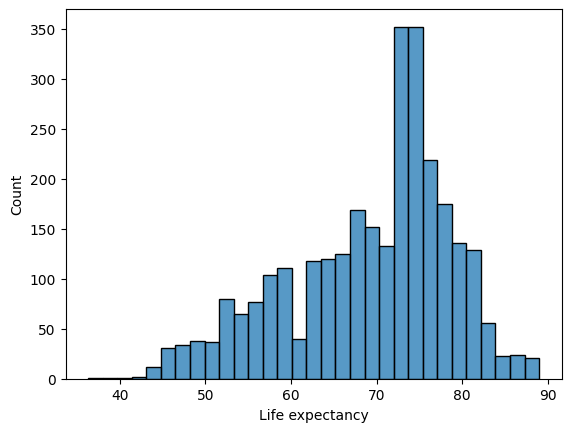

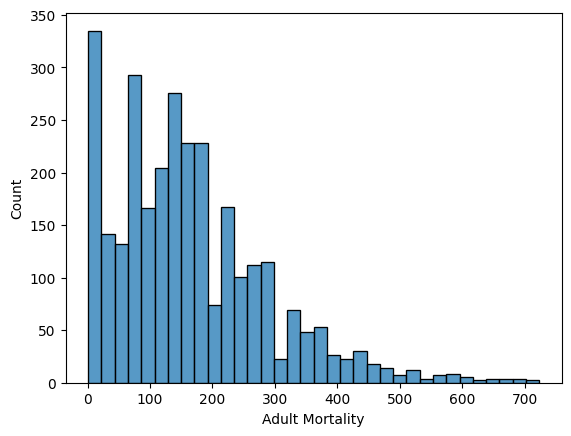

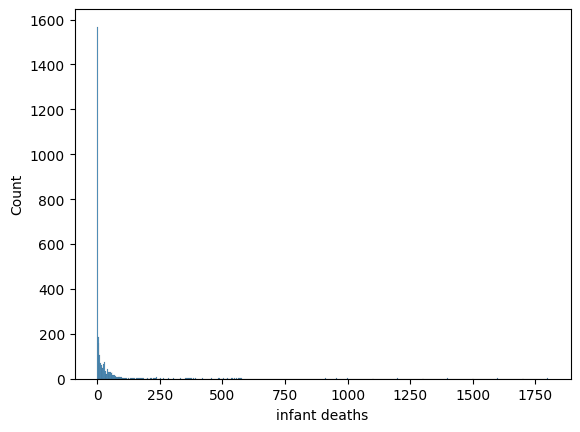

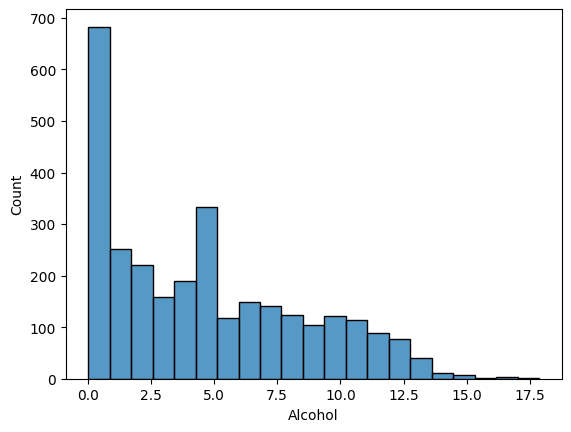

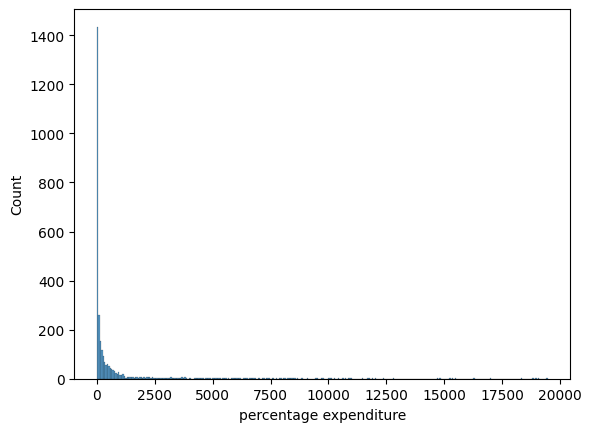

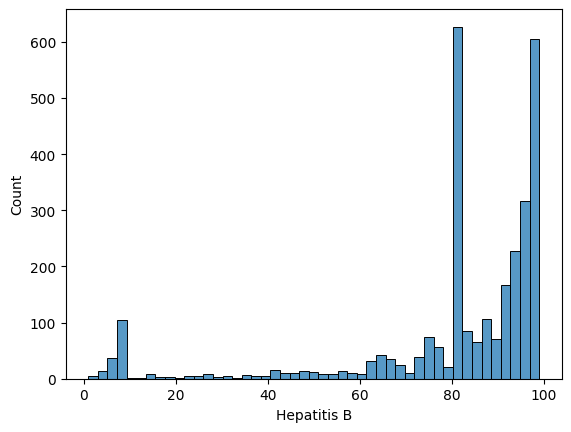

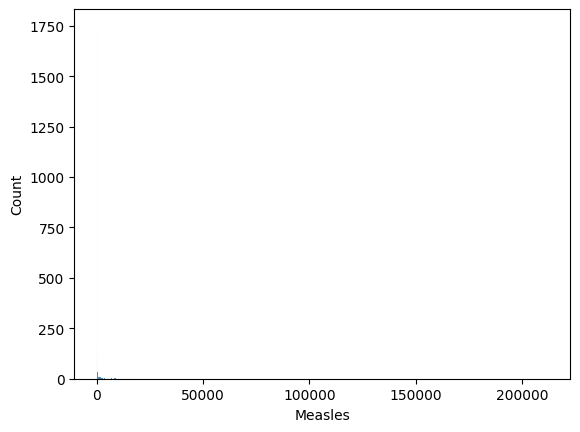

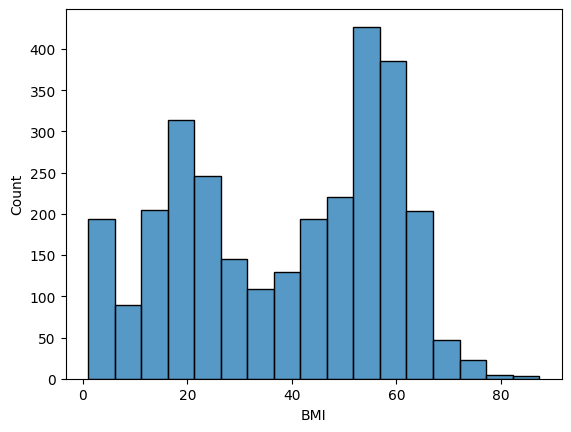

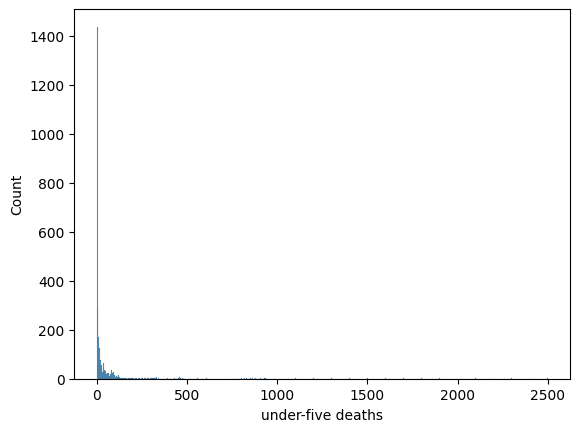

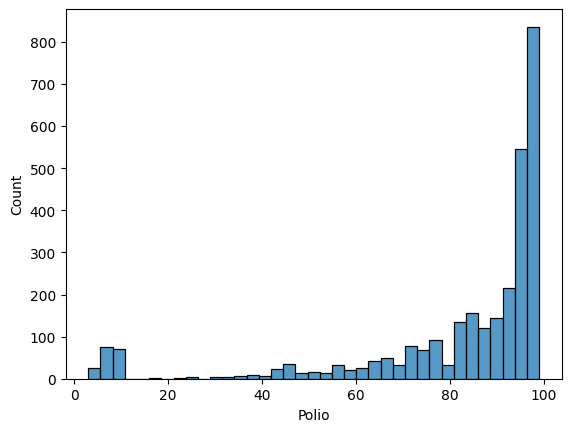

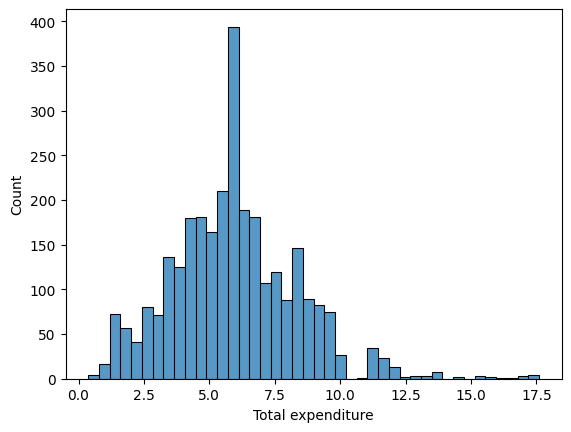

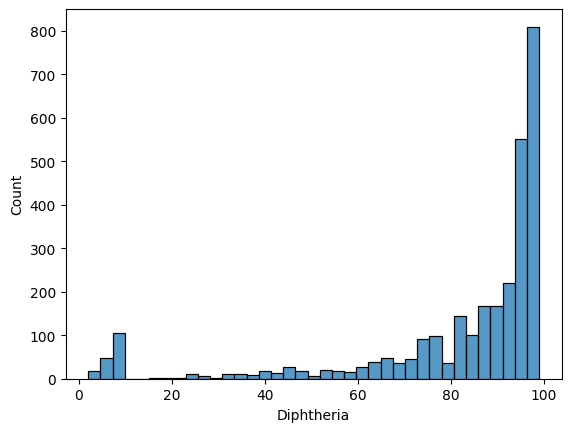

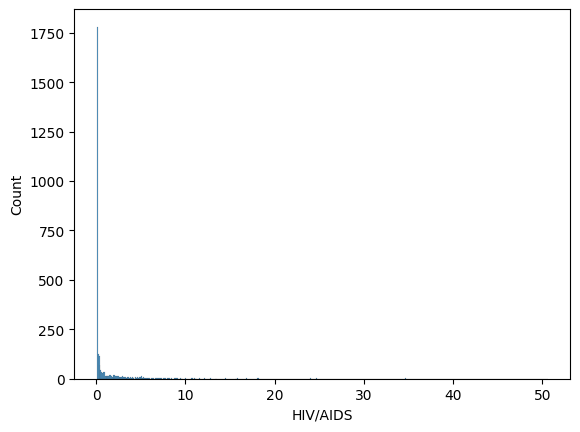

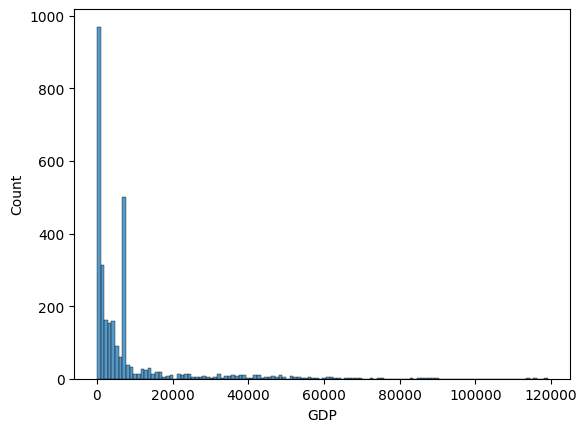

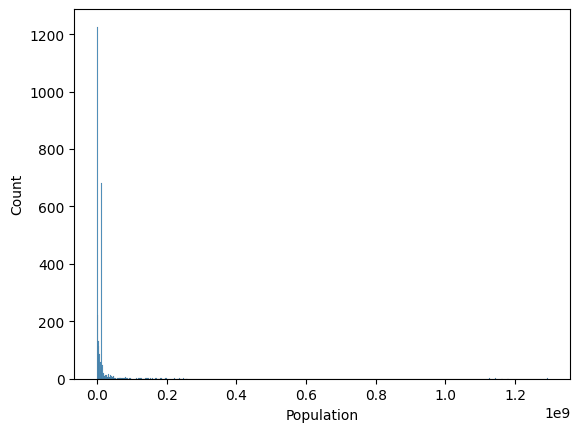

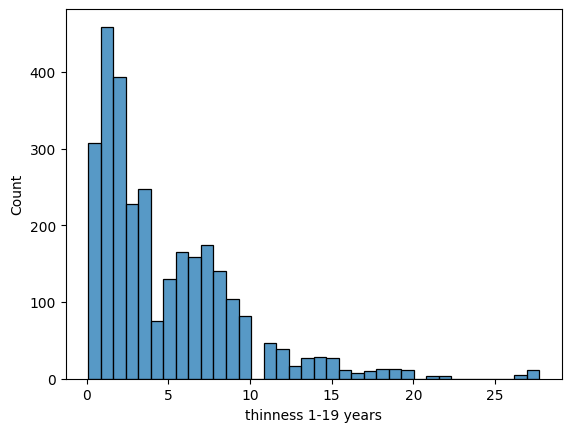

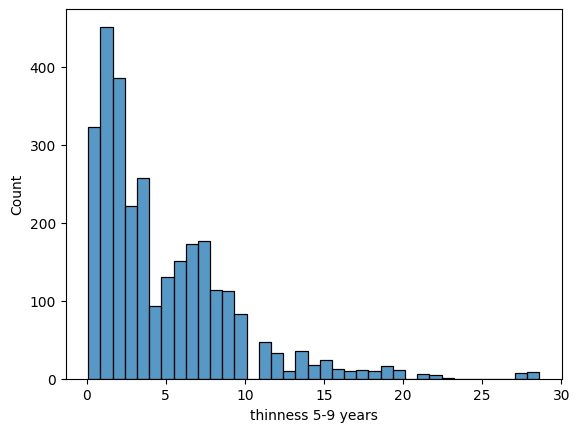

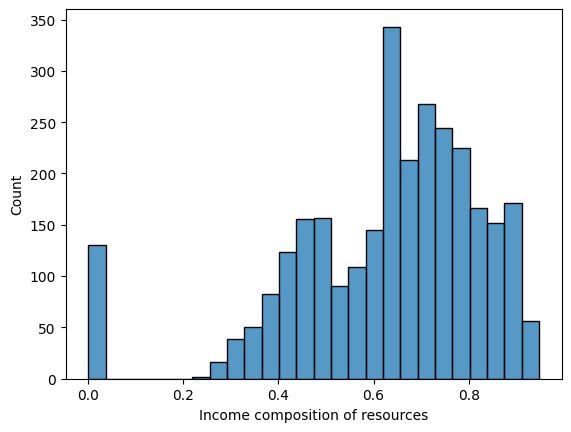

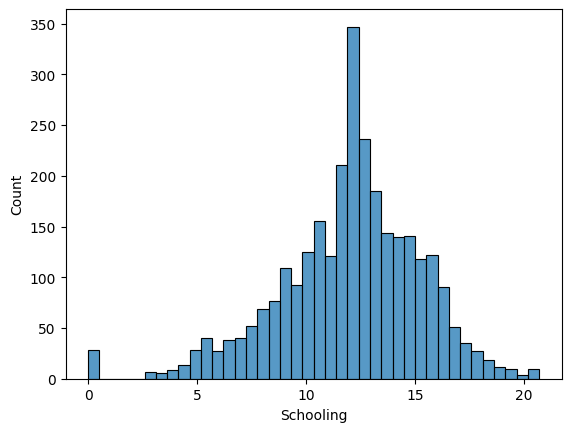

In [ ]:
for col in df2.select_dtypes(include="number").columns:
  sns.histplot(data=df2,x=col)
  plt.show()

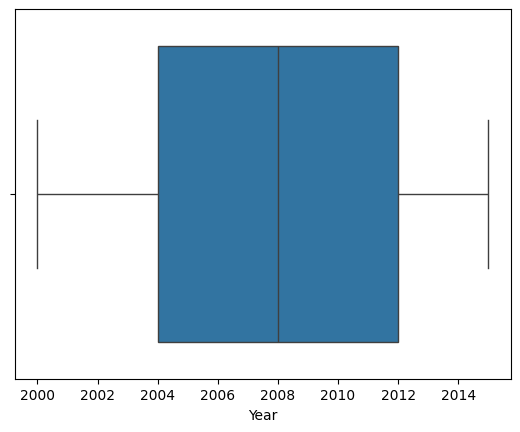

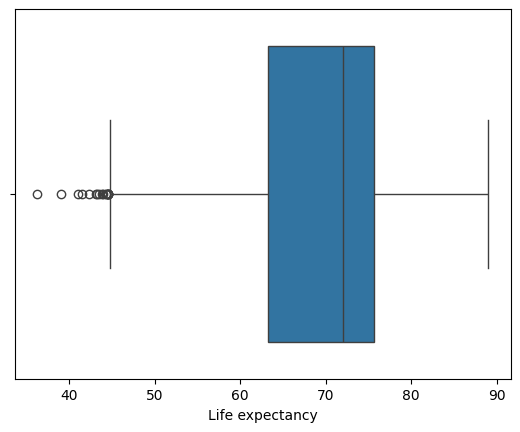

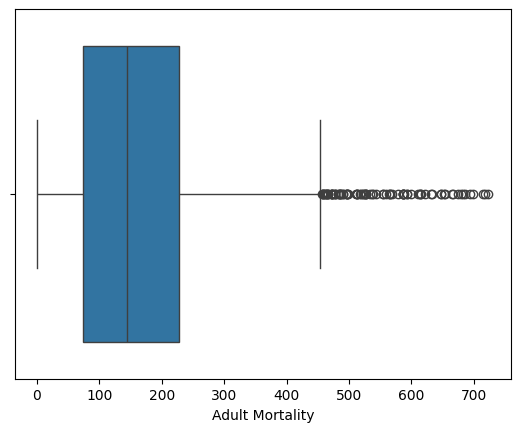

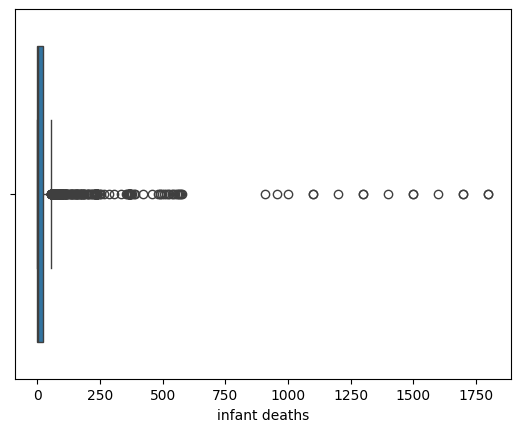

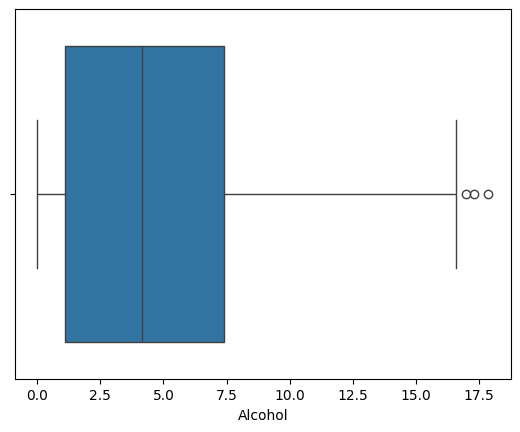

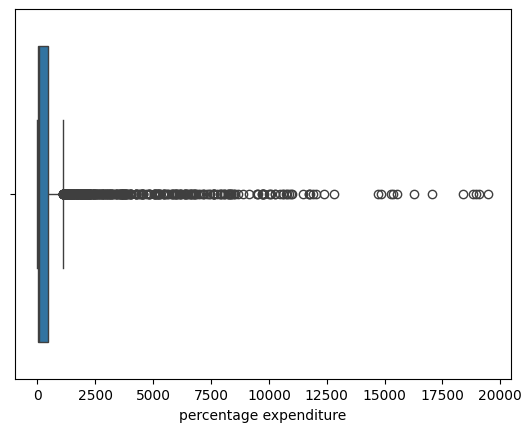

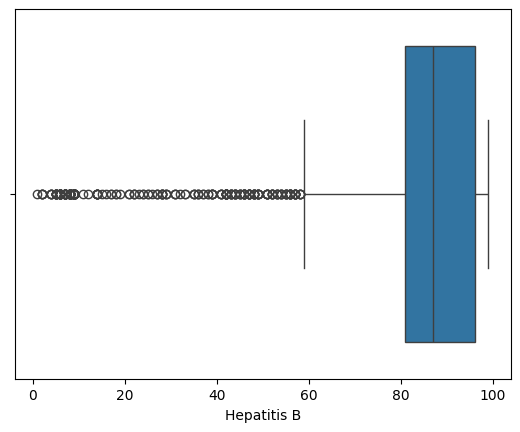

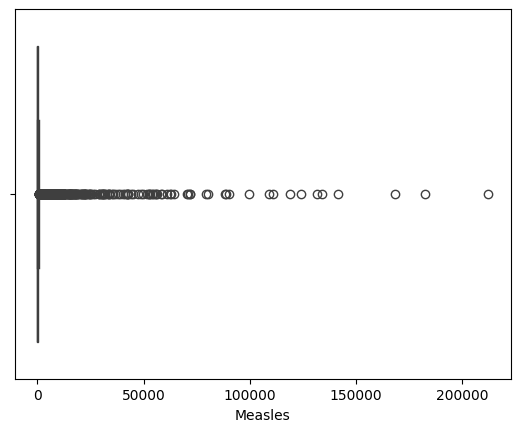

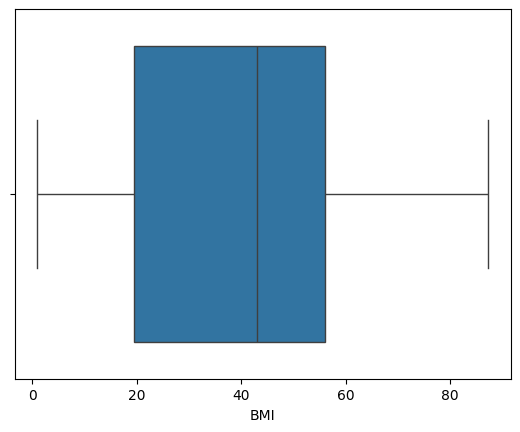

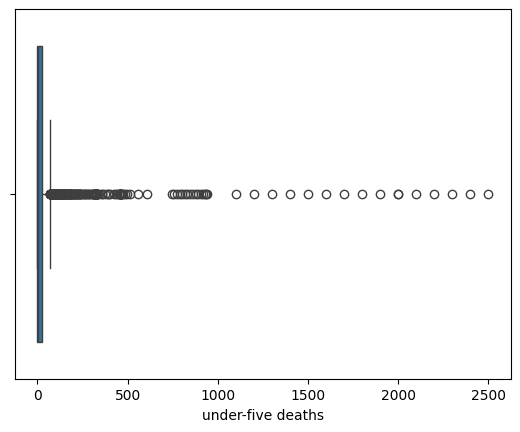

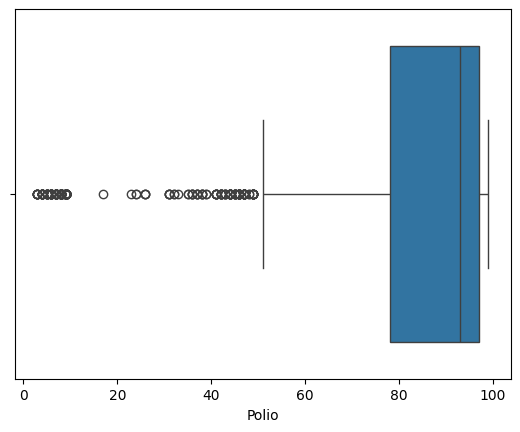

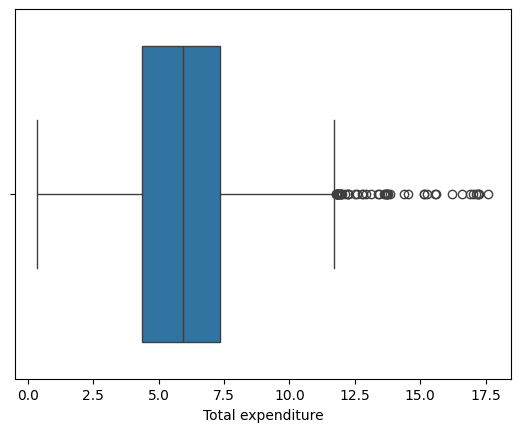

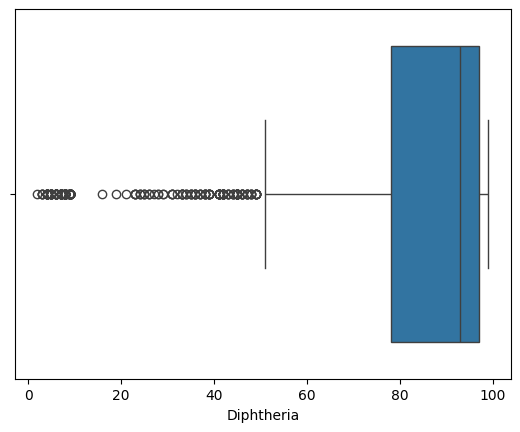

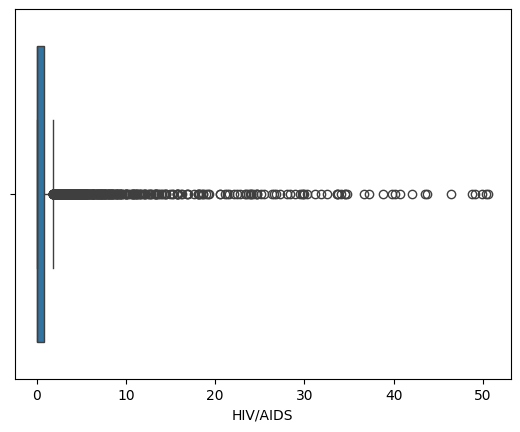

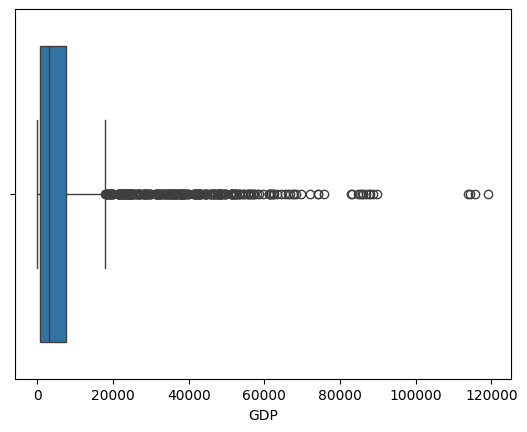

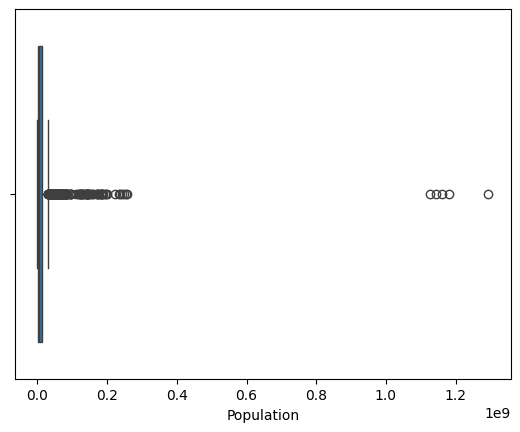

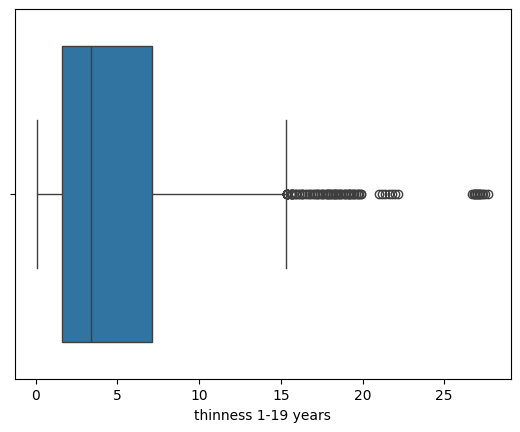

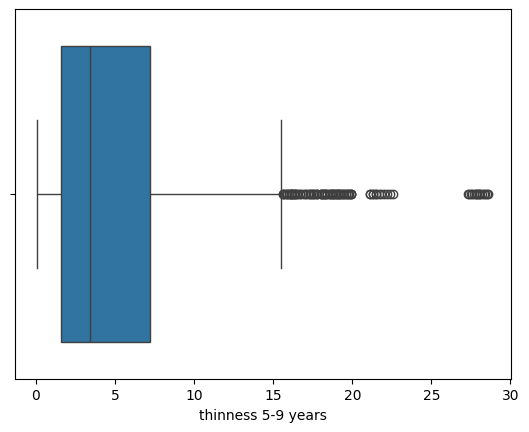

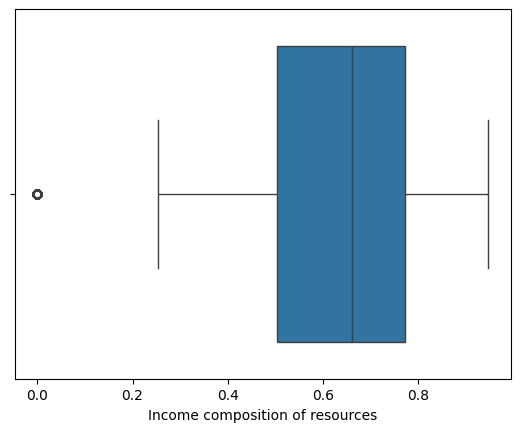

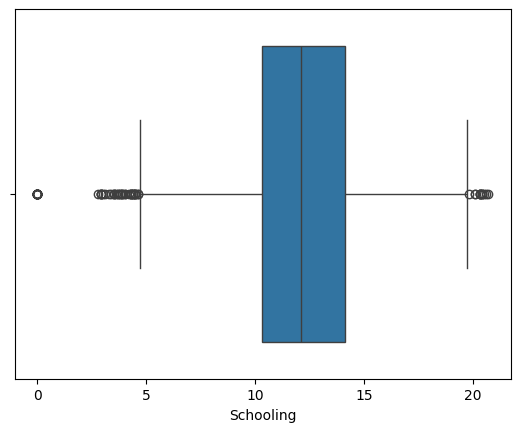

In [ ]:
for col in df2.select_dtypes(include="number").columns:
  sns.boxplot(data=df2,x=col)
  plt.show()

In [ ]:
df2.select_dtypes(include="number").columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
s=[
    'Year', 'Adult Mortality', 'infant deaths',
    'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
    'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
    'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
    'thinness 5-9 years', 'Income composition of resources', 'Schooling'
]

In [ ]:
cr=df2.select_dtypes(include="number").corr()

<Axes: >

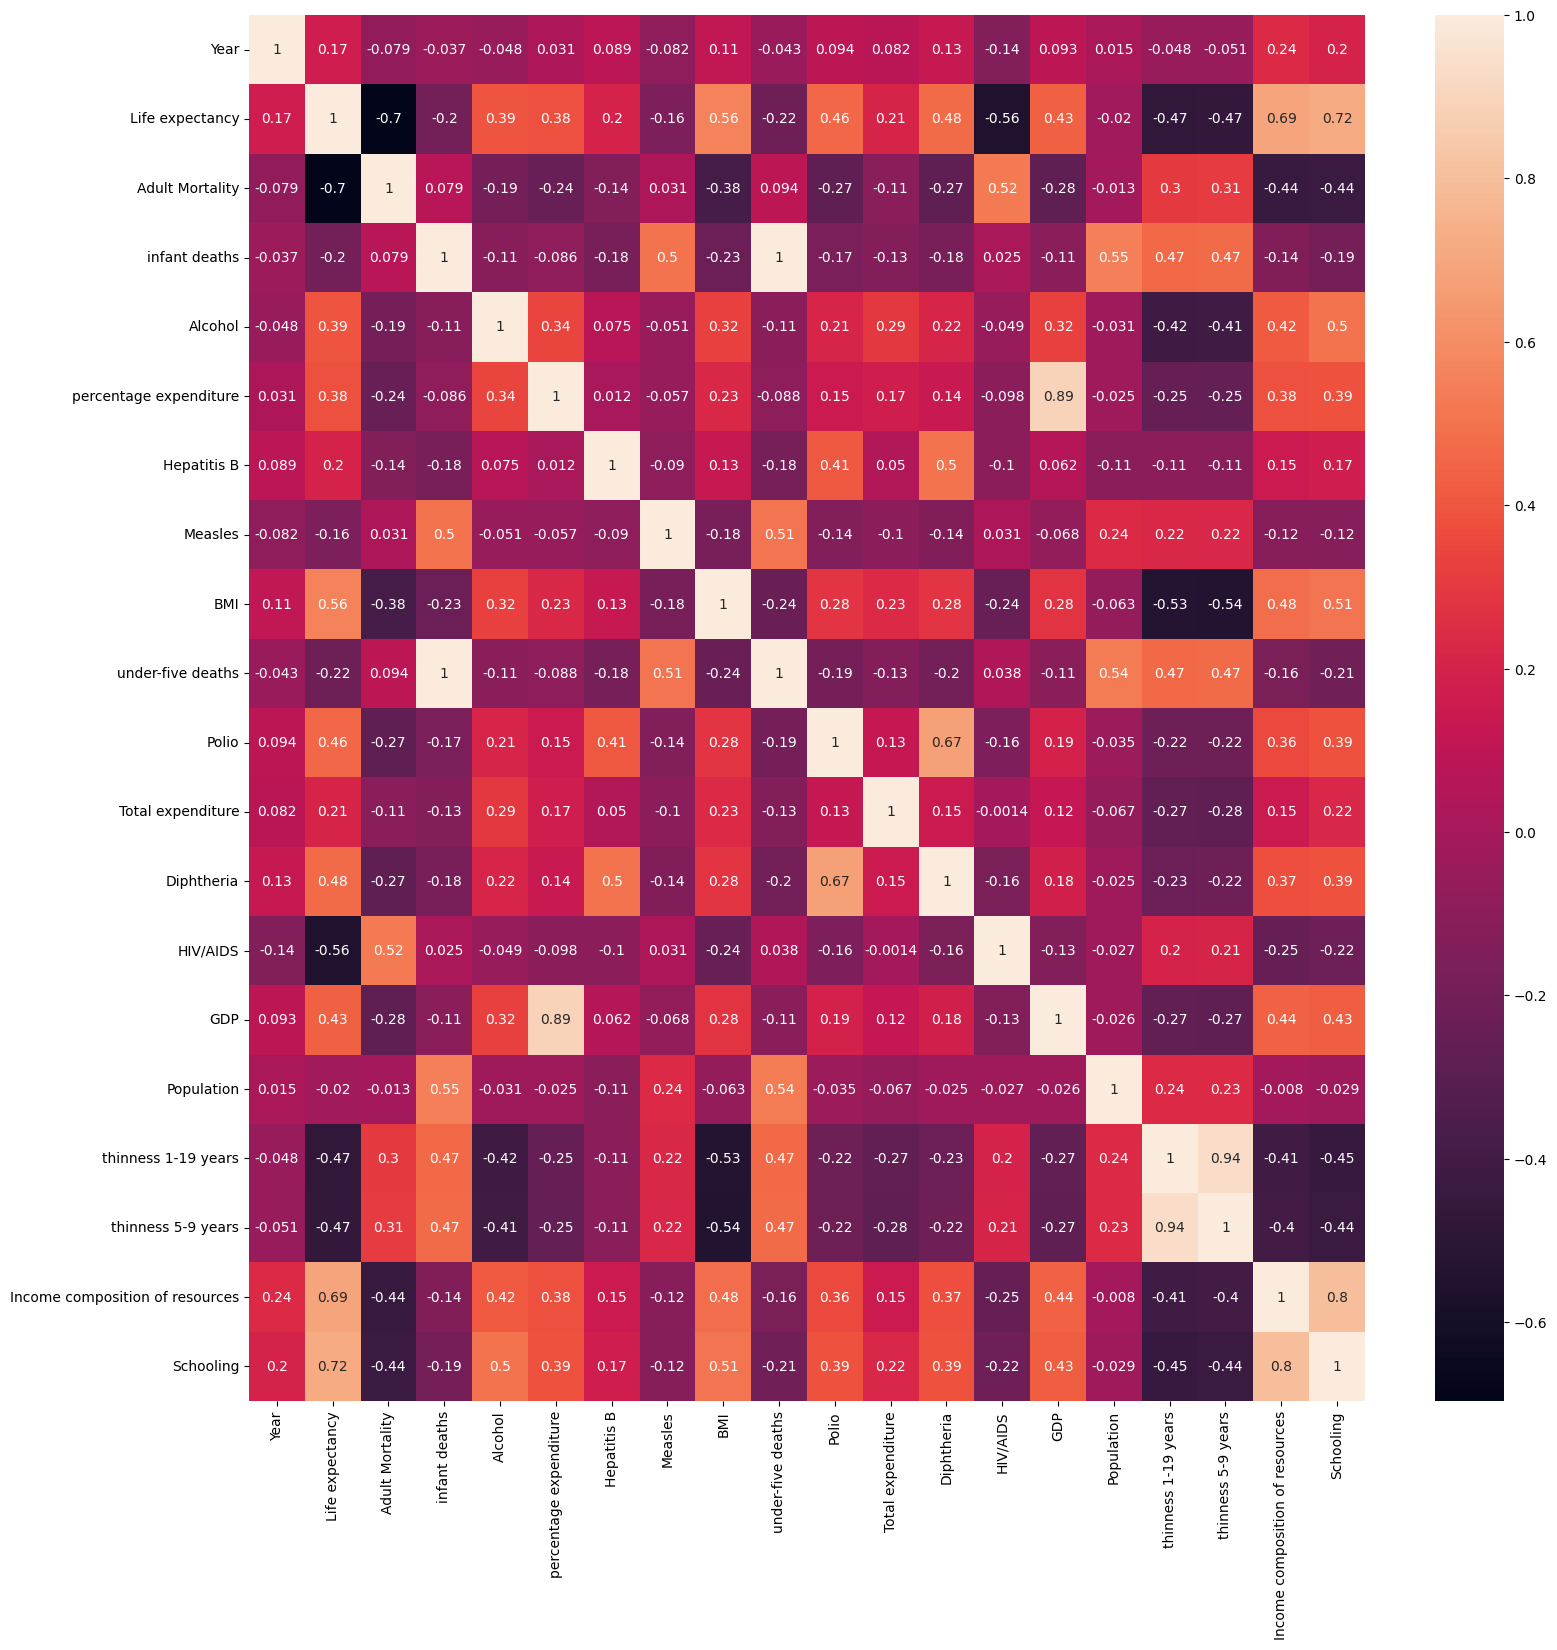

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(cr,annot=True)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df[['GDP']] = imputer.fit_transform(df[['GDP']])